In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math

In [ ]:
def leer (doc):
  data = pd.read_csv(doc)
  inc = data['Incidente (gr)'].to_numpy()*2*np.pi/360
  t = data['transmitido (gr)'].to_numpy()*2*np.pi/360
  i_err = data['e_incid (gr)'].to_numpy()*2*np.pi/360
  t_err = data['e_trans (gr)'].to_numpy()*2*np.pi/360
  return inc,t,i_err,t_err

def lineal(x, a, b):
  return a*x+ b

def snell(w, n):
  asin = []
  for j in range(len(w)):
    asin.append(math.asin(np.sin(w[j])/n))
  return asin

In [ ]:
lista = [
"https://docs.google.com/spreadsheets/d/e/2PACX-1vTT1dEq7yvvv8cDka9hS6Nd4bRjUg8ptNva1dC16LTniziXno6WTeuUL6gSPl9YQcy-qKYWtOX1ZdR5/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vTK1pCMw5Yko1Kt9uBv4FslD5U4TrTQEGHqbB00bsCKJL6OsQMAh40vdIPitMW_MaifcxdPWS7TY7AJ/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vSFxfviSPuldxr8mHecUKmrtknkH94INGSdPeUFHgcaj1ogViJ7XpCPARppYyWwP9yLqCNWE-JuTomH/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vQiwtFopuhpAgbscD_3QtOZZyuELMkD-xhsg7jtXsxU7VnYulwd45Sq9sDSceKH8BiJNzy9rC8k5u2M/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vTOTjExqYvb7KlIJLkDDA4LNuK9M8Tj_3cNLyo_YpvxsSKtbK2KeFlHdsPAxBmveqY9KAwBnFqmZn_2/pub?gid=0&single=true&output=csv",
"https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5lFJkYgIVvGOdah9KCk8P48D2N6IfjWUNMpPSQaGJ-xnurXaWVYgwo8aUre8Hzb11MGvD-RS0NvJ-/pub?gid=0&single=true&output=csv"]

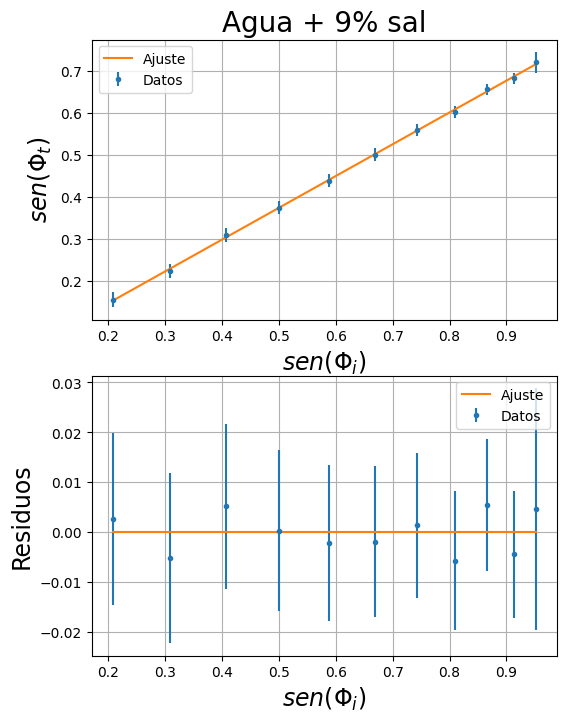

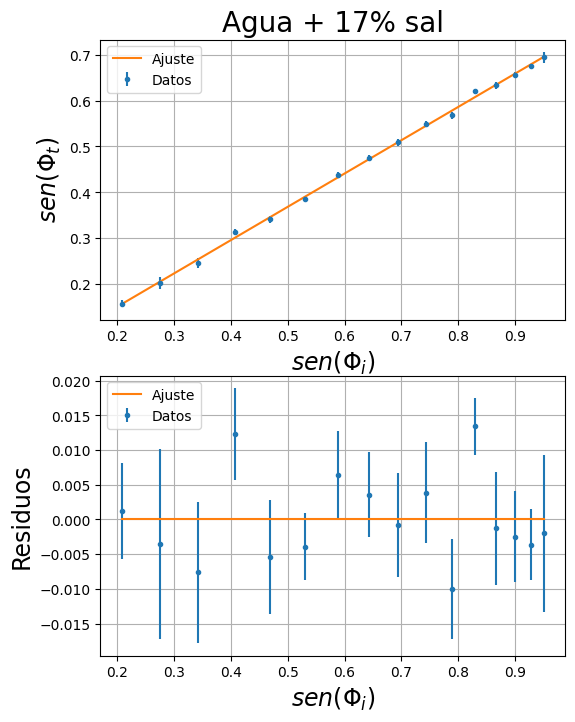

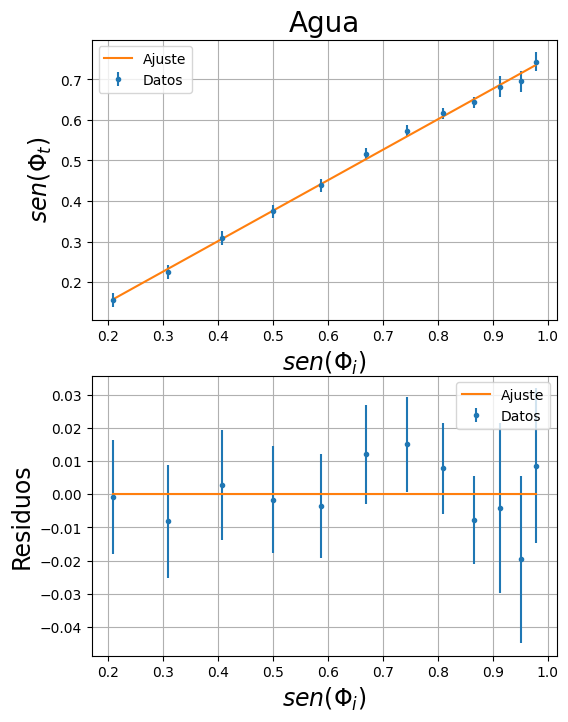

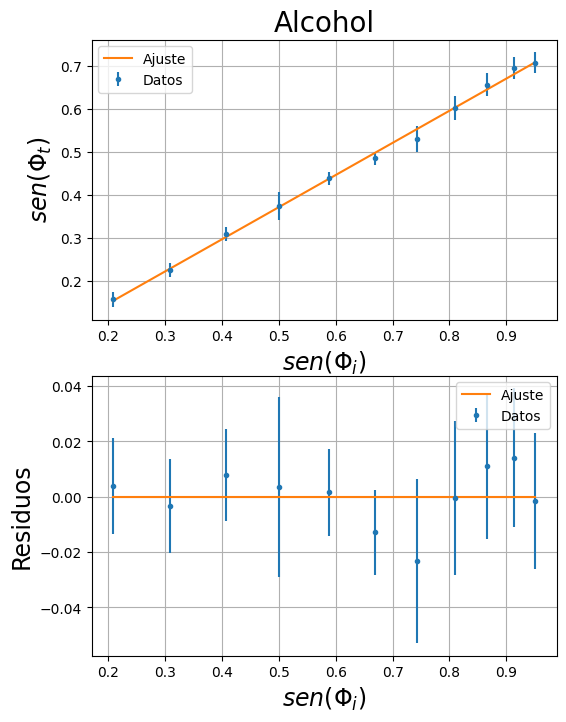

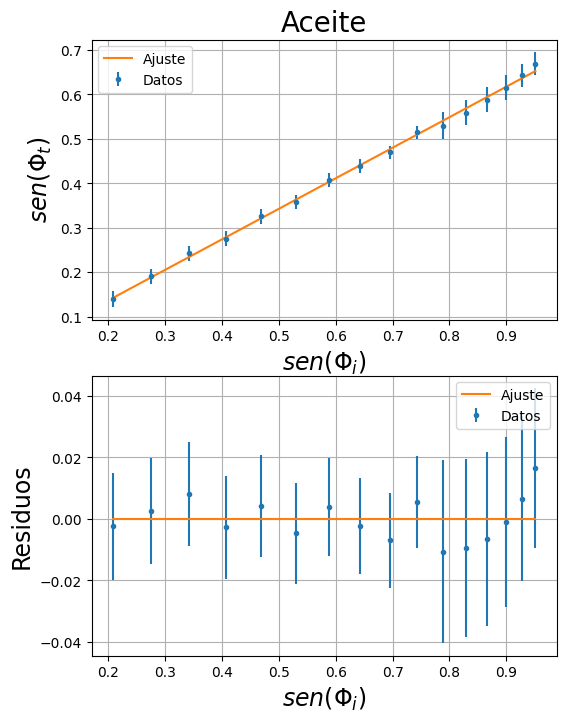

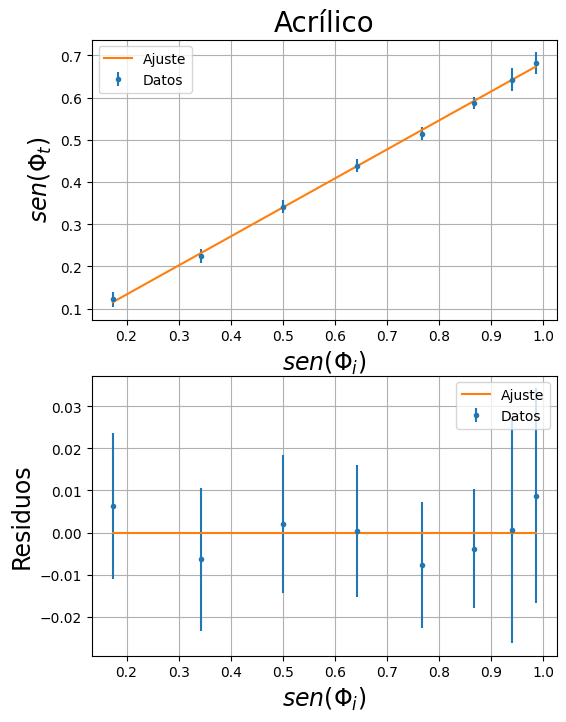

In [ ]:
names= ["Agua + 9% sal", "Agua + 17% sal","Agua","Alcohol","Aceite", "Acrílico"]

for i in range(len(lista)):
  inc, t, i_err, t_err = leer(lista[i])
  sen_i = np.sin(inc)
  sen_t = np.sin(t)
  sen_t_err = np.cos(t)*t_err
  p, cov = scipy.optimize.curve_fit(lineal, sen_i, sen_t)#, sigma=sen_t_err, absolute_sigma=True)
  err = np.sqrt(np.diag(cov))
  y_fit = lineal(sen_i, p[0], p[1])
  plt.figure(figsize=(6,8))
  ax1 = plt.subplot(2,1,1)
  plt.errorbar(sen_i, sen_t, yerr=sen_t_err, fmt=".", label="Datos")
  plt.plot(sen_i, y_fit, "-", label = "Ajuste")
  plt.xlabel("$sen(\Phi_i)$", fontsize=17), plt.ylabel("$sen(\Phi_t)$", fontsize=17)
  plt.grid(), plt.legend()
  plt.title(f"{names[i]}", fontsize=20)

  plt.subplot(2,1,2, sharex=ax1)
  plt.errorbar(sen_i, sen_t-y_fit, yerr=sen_t_err, fmt='.', label="Datos")
  plt.plot(sen_i, y_fit*0, "-", label = "Ajuste")
  plt.xlabel("$sen(\Phi_i)$", fontsize=17), plt.ylabel("Residuos", fontsize=17)
  plt.grid(), plt.legend()

  # p[1], 1/p[0], err[0]/(p[0]**2)